# Extraction d'images de la base CIFAR 10

Ce script charge la base CIFAR 10, puis génère une mosaïque d'images, utilisée pour illustrer la présentation faite aux JSIE.

In [1]:
import torchvision
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib.patches import Patch
import numpy as np

# Téléchargement de la base CIFAR 10
ds = torchvision.datasets.CIFAR10(root='./downloads', train=True, download=True)

Files already downloaded and verified


In [2]:
# Je choisis une partie des images de la base et les présenter sous forme d'une grille
# Nombre de colonnes et de lignes que je veux sur la grille d'images
nb_rows = 20
nb_cols = int(nb_rows * 16/9)
nb_images = nb_cols*nb_rows
# Sélection d'images
images = ds.data[0:nb_images]
# Labels des images
targets = np.array(ds.targets[0:nb_cols*nb_rows])
# id des images
ids = np.arange(nb_cols*nb_rows)
# Coordonnées X/Y des images dans la grille
x = ids % nb_cols
y = ids // nb_cols

# Concaténation des images pour former une seule grosse image en grille
_, im_height, im_width, im_channels = images.shape
# Les lignes suivantes permettent de modifier le tableau des images puis de concaténer
# Je passe de la forme (nb_images, im_height, im_width, im_channels) 
# à la forme (nb_rows, nb_cols, im_height, im_width, im_channels)
im_grid = np.reshape(images, (nb_rows, nb_cols, im_height, im_width, im_channels))
# Puis je permute à la forme (nb_rows, im_height, nb_cols, im_width, im_channels)
im_grid = np.transpose(im_grid,(0,2,1,3,4))
# Puis je concatène : j'obtiens la forme (nb_rows * im_height, nb_cols, im_width, im_channels)
im_grid = np.concatenate(im_grid)
# Puis je permute vers la forme (nb_cols, im_width, nb_rows * im_height,  im_channels)
im_grid = np.transpose(im_grid,(1,2,0,3))
# Puis je concatène : j'obtiens la forme (nb_cols * im_width, nb_rows * im_height, im_channels)
im_grid = np.concatenate(im_grid)
# Dernière transposition vers la forme (nb_rows * im_height, nb_cols * im_width, im_channels)
im_grid = np.transpose(im_grid,(1,0,2))


# Sauvegarde de la grille d'images
Image.fromarray(im_grid).save("out/cifar10.png")


700 images


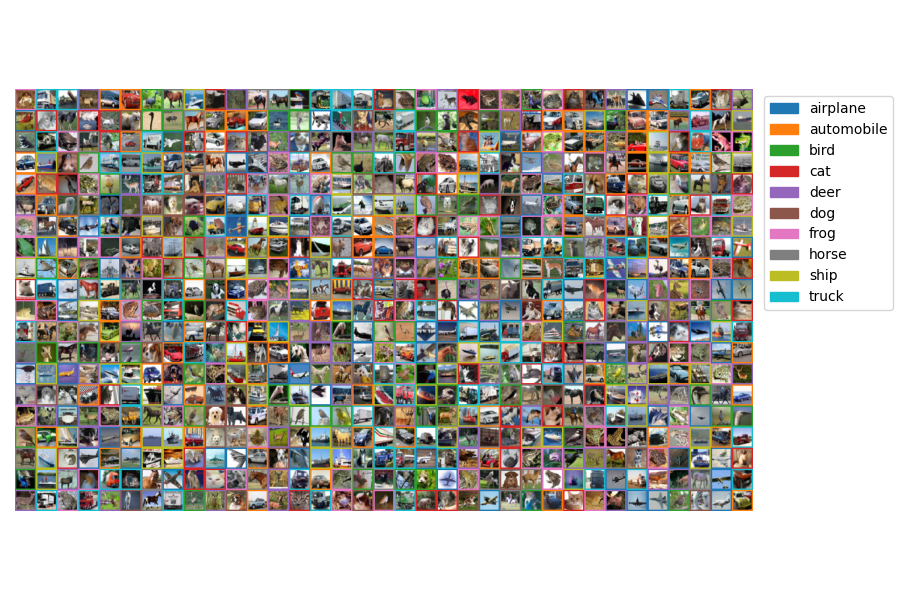

In [3]:
# Je vais maintenant encadrer dans une même couleur les éléments d'une même classe
# couleurs utilisées : vu qu'il y a 10 classes, je choisis "tab10"
color_map = colormaps['tab10']

im_encadree = im_grid
border_width = 2
for x_item, y_item, target_item in zip(x, y, targets):
    couleur = np.array(color_map(target_item)[0:3])*255
    im_encadree[
        y_item*im_height:(y_item+1)*im_height,
        x_item*im_width:x_item*im_width+border_width
    ] = couleur
    im_encadree[
        y_item*im_height:(y_item+1)*im_height,
        (x_item+1)*im_width-border_width:(x_item+1)*im_width
    ] = couleur
    im_encadree[
        y_item*im_height:y_item*im_height+border_width,
        x_item*im_width:(x_item+1)*im_width
    ] = couleur
    im_encadree[
        (y_item+1)*im_height-border_width:(y_item+1)*im_height,
        x_item*im_width:(x_item+1)*im_width
    ] = couleur


# Affichage de l'image
fig = plt.figure(figsize=(9,6))
plt.axis("off")
plt.imshow(im_encadree)
# Ajout d'une légende
plt.legend(
    handles=[Patch(color=color_map(i), label=ds.classes[i]) for i in range(10)],
    bbox_to_anchor=(1.0,0.0,0.2,1.0)
    )
plt.tight_layout()
fig.savefig("out/cifar10_annotated.png")

print(f"{nb_images} images")
